In [1]:
import os
import glob
import pandas as pd
import numpy as np
import random
from collections import Counter
from PIL import Image
from IPython.display import display
import shutil

In [2]:
working_dir = '/Users/suzyxu/Documents/ML/Mohs2023/data/' # PUT YOUR HOME HERE
processed_data = working_dir + "processed/"
experiment_folder = working_dir + "model/Mohs_BCC_SCC_2023_propsplit/model/"
blind_review_folder = working_dir + "blind_review/"
in_file = "val_data_predictions.csv"

In [3]:
in_df = pd.read_csv(experiment_folder + in_file, index_col = 0)
in_df["full_path"] = [path.replace("/home/ubuntu/Data/MOHS/processed/", processed_data) for path in in_df["full_path"]]

in_df

,full_path,image_name,metadata,patient,slide,zoom,cancer,image_number,patch_number,patch_cancer,class_set,Prediction,Probabilities
0,/Users/suzyxu/Documents/ML/Mohs2023/data/proce...,6_A_10x_N_9_p_1_N.jpg,6_A_10x_N_9_p_1_N,6,A,10x,N,9,1,N,val,N,[9.9340206e-05 9.9990058e-01 1.6296374e-07]
1,/Users/suzyxu/Documents/ML/Mohs2023/data/proce...,14_A_10x_N_43_p_2_N.jpg,14_A_10x_N_43_p_2_N,14,A,10x,N,43,2,N,val,N,[2.9745367e-03 9.9680173e-01 2.2372643e-04]
2,/Users/suzyxu/Documents/ML/Mohs2023/data/proce...,12_B_10x_BCC_11_p_2_N.jpg,12_B_10x_BCC_11_p_2_N,12,B,10x,BCC,11,2,N,val,N,[1.1609828e-01 8.8388807e-01 1.3634309e-05]
3,/Users/suzyxu/Documents/ML/Mohs2023/data/proce...,1_A_10x_N_1_p_1_N.jpg,1_A_10x_N_1_p_1_N,1,A,10x,N,1,1,N,val,N,[3.4779713e-02 9.6520430e-01 1.5979216e-05]
4,/Users/suzyxu/Documents/ML/Mohs2023/data/proce...,12_B_10x_BCC_18_p_4_B.jpg,12_B_10x_BCC_18_p_4_B,12,B,10x,BCC,18,4,B,val,B,[9.9999654e-01 3.4078839e-06 5.8676324e-08]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,/Users/suzyxu/Documents/ML/Mohs2023/data/proce...,3_A_10x_N_40_p_3_N.jpg,3_A_10x_N_40_p_3_N,3,A,10x,N,40,3,N,val,N,[0.00573689 0.98895824 0.00530485]
398,/Users/suzyxu/Documents/ML/Mohs2023/data/proce...,11_D_10x_N_73_p_3_N.jpg,11_D_10x_N_73_p_3_N,11,D,10x,N,73,3,N,val,N,[6.792115e-03 9.932064e-01 1.567026e-06]
399,/Users/suzyxu/Documents/ML/Mohs2023/data/proce...,15_B_10x_N_2_p_3_N.jpg,15_B_10x_N_2_p_3_N,15,B,10x,N,2,3,N,val,N,[0.01302314 0.9859103 0.00106658]
400,/Users/suzyxu/Documents/ML/Mohs2023/data/proce...,11_D_10x_N_37_p_4_N.jpg,11_D_10x_N_37_p_4_N,11,D,10x,N,37,4,N,val,N,[2.9144165e-04 9.9964154e-01 6.6983135e-05]


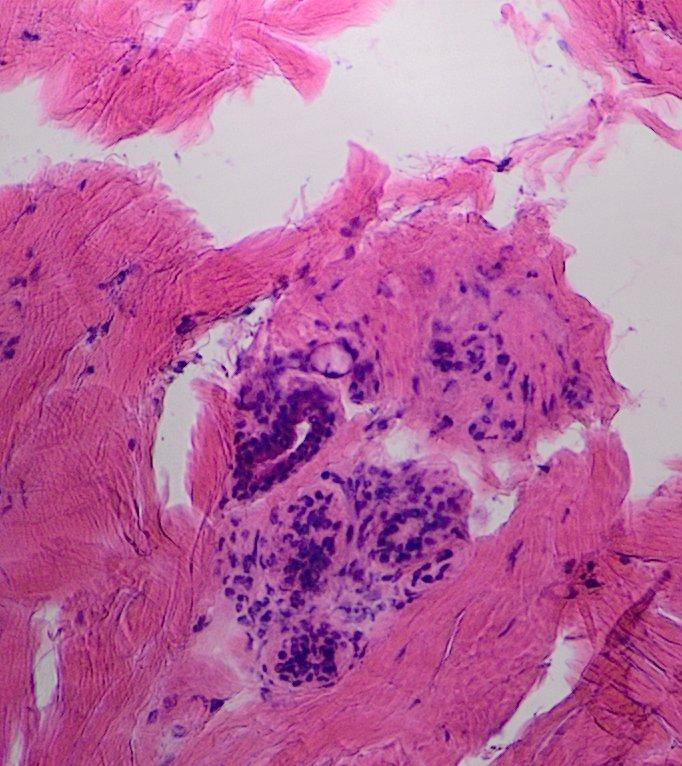

In [4]:
img_in = in_df["full_path"][0]
# Open an image file
img = Image.open(img_in)
# Display the image
display(img)

In [5]:
print(len(np.unique(in_df["patient"])))
counts = in_df.groupby(['cancer', 'patient']).size().reset_index(name='counts')
counts

20


,cancer,patient,counts
0,BCC,1,1
1,BCC,2,7
2,BCC,4,9
3,BCC,5,1
4,BCC,8,2
5,BCC,10,1
6,BCC,11,36
7,BCC,12,40
8,BCC,18,9
9,N,1,9


In [6]:
positives = in_df[in_df['cancer'] != 'N']
test_sample_pos = positives.groupby(["patient", "cancer"], group_keys=False).apply(lambda x: x.sample(n=10, replace=True, random_state=12))
test_sample_pos = test_sample_pos.drop_duplicates(subset=['image_name'])
len(test_sample_pos)


79

In [7]:
negatives = in_df[in_df['cancer'] == 'N']
test_sample_neg = negatives.groupby(["patient"], group_keys=False).apply(lambda x: x.sample(n=2, random_state=2))
len(test_sample_neg)

40

In [8]:
test_sample = pd.concat([test_sample_pos, test_sample_neg])
test_sample.reset_index(drop=True, inplace=True)
sampled_df = test_sample.copy()

In [9]:
print(len(np.unique(sampled_df["patient"])))
counts = sampled_df.groupby(['cancer', 'patient']).size().reset_index(name='counts')
counts

20


,cancer,patient,counts
0,BCC,1,1
1,BCC,2,7
2,BCC,4,7
3,BCC,5,1
4,BCC,8,2
5,BCC,10,1
6,BCC,11,9
7,BCC,12,9
8,BCC,18,7
9,N,1,2


In [10]:
# Define your destination folder
os.makedirs(blind_review_folder, exist_ok=True)

sampled_df['blind_path'] = ""

# Loop over the DataFrame index and copy the files
for index, row in sampled_df.iterrows():
    # Source file path
    source_file = row['full_path']
    
    # Destination file path, named as {index}.jpg
    destination_file = os.path.join(blind_review_folder, f"{index}.jpg")
    
    # Copy the file to the destination
    shutil.copy(source_file, destination_file)
    
    # Update the DataFrame with the new file path
    sampled_df.at[index, 'blind_path'] = destination_file

In [11]:
sampled_df.to_csv(experiment_folder + "blind_review_key.csv")